In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dataset_df = pd.read_csv('../../case data/hose-price-prediction/train.csv',index_col='Id',na_filter=True)
dataset = np.genfromtxt('../../case data/hose-price-prediction/train.csv',delimiter=',',skip_header=True)
dataset

array([[1.00000e+00, 6.00000e+01,         nan, ...,         nan,
                nan, 2.08500e+05],
       [2.00000e+00, 2.00000e+01,         nan, ...,         nan,
                nan, 1.81500e+05],
       [3.00000e+00, 6.00000e+01,         nan, ...,         nan,
                nan, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01,         nan, ...,         nan,
                nan, 2.66500e+05],
       [1.45900e+03, 2.00000e+01,         nan, ...,         nan,
                nan, 1.42125e+05],
       [1.46000e+03, 2.00000e+01,         nan, ...,         nan,
                nan, 1.47500e+05]])

In [3]:
def bin_split(data, feature, value):
    mat0 = data[np.nonzero(data[:, feature] > value)[0],:][0]
    mat1 = data[np.nonzero(data[:, feature] <= value)[0],:][0]
    return mat0, mat1

In [4]:
def bin_split_df(data, feature, value):
    mat0 = data.iloc[np.nonzero(data[feature].values > value)[0],:].iloc[0]
    mat1 = data.iloc[np.nonzero(data[feature].values <= value)[0], :].iloc[0]
    return mat0, mat1

In [5]:
mat0,mat1 = bin_split(dataset,1,20)
mat0.shape,mat1.shape

((81,), (81,))

In [6]:
m0,m1 = bin_split_df(dataset_df,'MSSubClass',20)

In [7]:
m0.values

array([60, 'RL', 65.0, 8450, 'Pave', nan, 'Reg', 'Lvl', 'AllPub',
       'Inside', 'Gtl', 'CollgCr', 'Norm', 'Norm', '1Fam', '2Story', 7, 5,
       2003, 2003, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', 'BrkFace',
       196.0, 'Gd', 'TA', 'PConc', 'Gd', 'TA', 'No', 'GLQ', 706, 'Unf', 0,
       150, 856, 'GasA', 'Ex', 'Y', 'SBrkr', 856, 854, 0, 1710, 1, 0, 2,
       1, 3, 1, 'Gd', 8, 'Typ', 0, nan, 'Attchd', 2003.0, 'RFn', 2, 548,
       'TA', 'TA', 'Y', 0, 61, 0, 0, 0, 0, nan, nan, nan, 0, 2, 2008,
       'WD', 'Normal', 208500], dtype=object)

In [8]:
m1.values

array([20, 'RL', 80.0, 9600, 'Pave', nan, 'Reg', 'Lvl', 'AllPub', 'FR2',
       'Gtl', 'Veenker', 'Feedr', 'Norm', '1Fam', '1Story', 6, 8, 1976,
       1976, 'Gable', 'CompShg', 'MetalSd', 'MetalSd', 'None', 0.0, 'TA',
       'TA', 'CBlock', 'Gd', 'TA', 'Gd', 'ALQ', 978, 'Unf', 0, 284, 1262,
       'GasA', 'Ex', 'Y', 'SBrkr', 1262, 0, 0, 1262, 0, 1, 2, 0, 3, 1,
       'TA', 6, 'Typ', 1, 'TA', 'Attchd', 1976.0, 'RFn', 2, 460, 'TA',
       'TA', 'Y', 298, 0, 0, 0, 0, 0, nan, nan, nan, 0, 5, 2007, 'WD',
       'Normal', 181500], dtype=object)

In [9]:
dataset_df.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [10]:
dataset_df.select_dtypes(include=np.number).isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [11]:
subset = dataset_df[['LotArea','SalePrice']]
subset.sort_values(by='LotArea')

,LotArea,SalePrice
Id,,
957,1300,124000
1040,1477,80000
615,1491,75500
490,1526,86000
1450,1533,92000
...,...,...
452,70761,280000
707,115149,302000
250,159000,277000


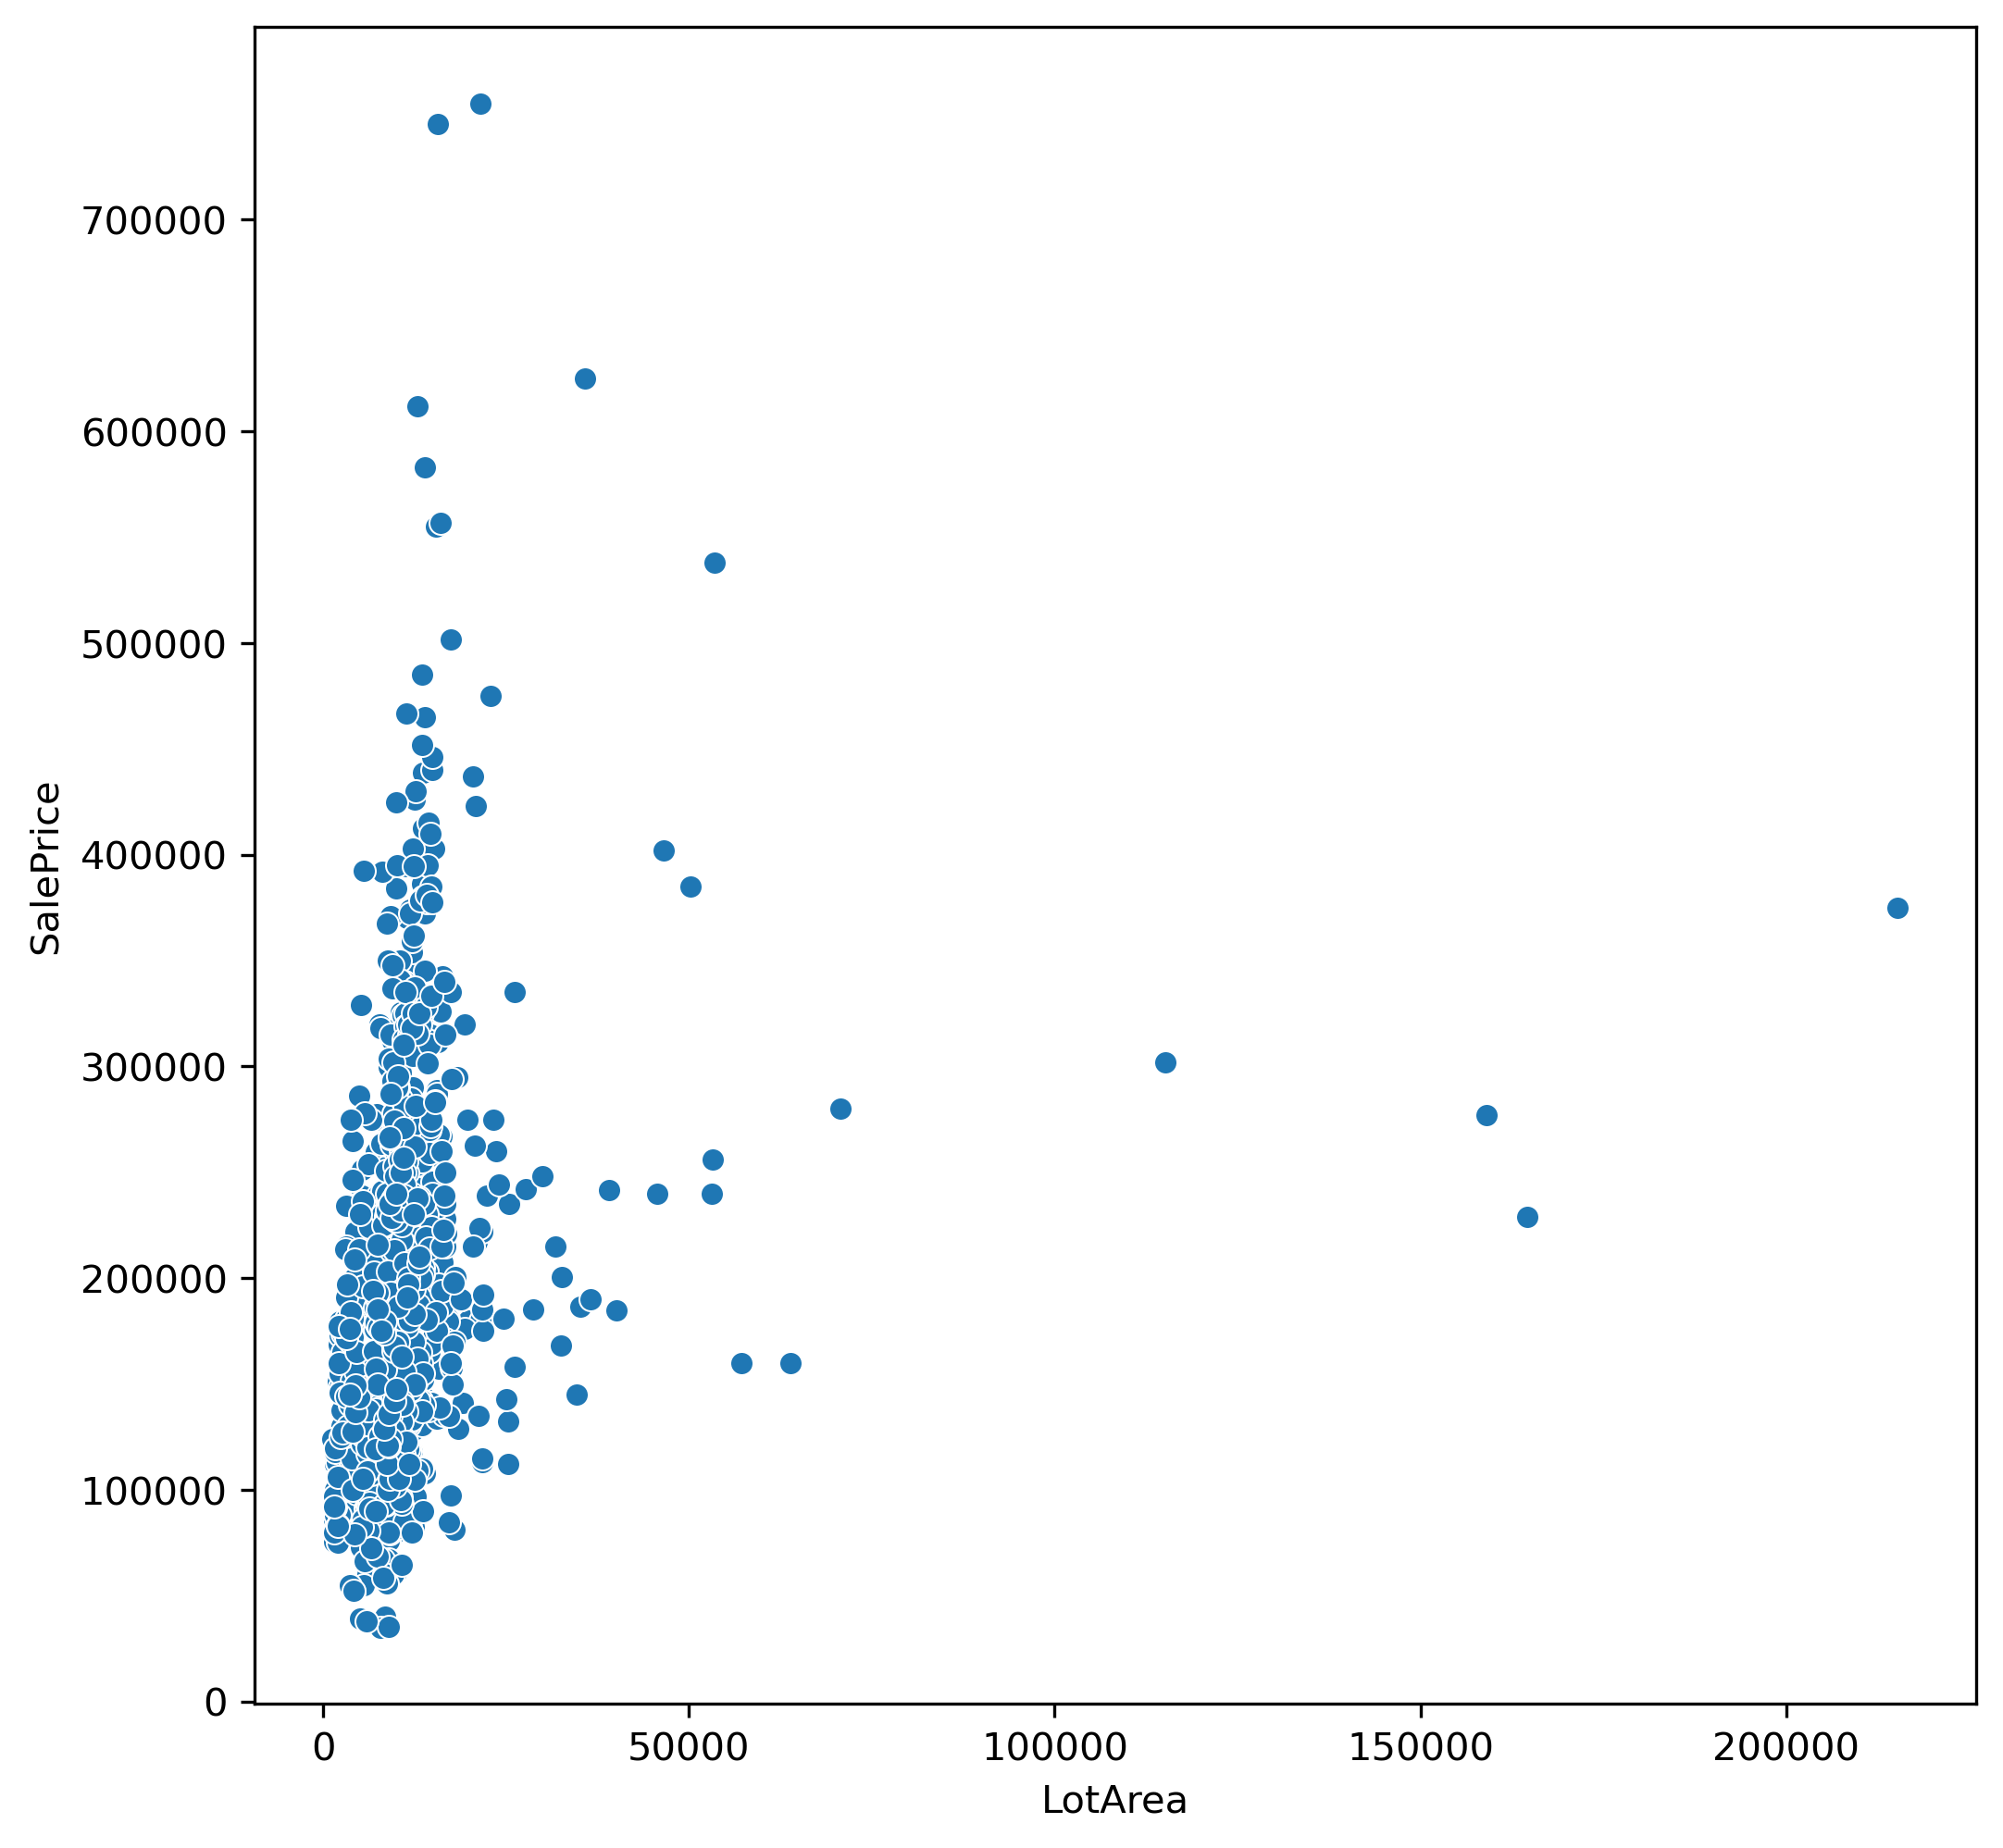

In [12]:
plt.figure(figsize=[8,8],dpi=300)
sns.scatterplot(x='LotArea',y='SalePrice',data=subset)
plt.show()

In [24]:
import regression_model as reg
model = reg.TreeBuilder(subset,'LotArea','SalePrice',20,60)
tree = model.builder(data=subset)

10923.6
8618.2
7202.15
5399.6
2908.85
4036.75
4650.95
6429.25
6073.35
6957.3
8135.1
7819.35
7592.0
8363.5
8471.3
10030.85
9107.25
8852.0
9006.4
9592.85
9359.85
9800.9
10481.5
10326.1
10686.05
14215.0
11812.8
11405.1
11207.3
12480.55
12210.5
13156.6
13558.3
43625.4
17888.2
15514.85


In [26]:
import json

with open('./tree.json','w') as out:
    json.dump(tree,out)

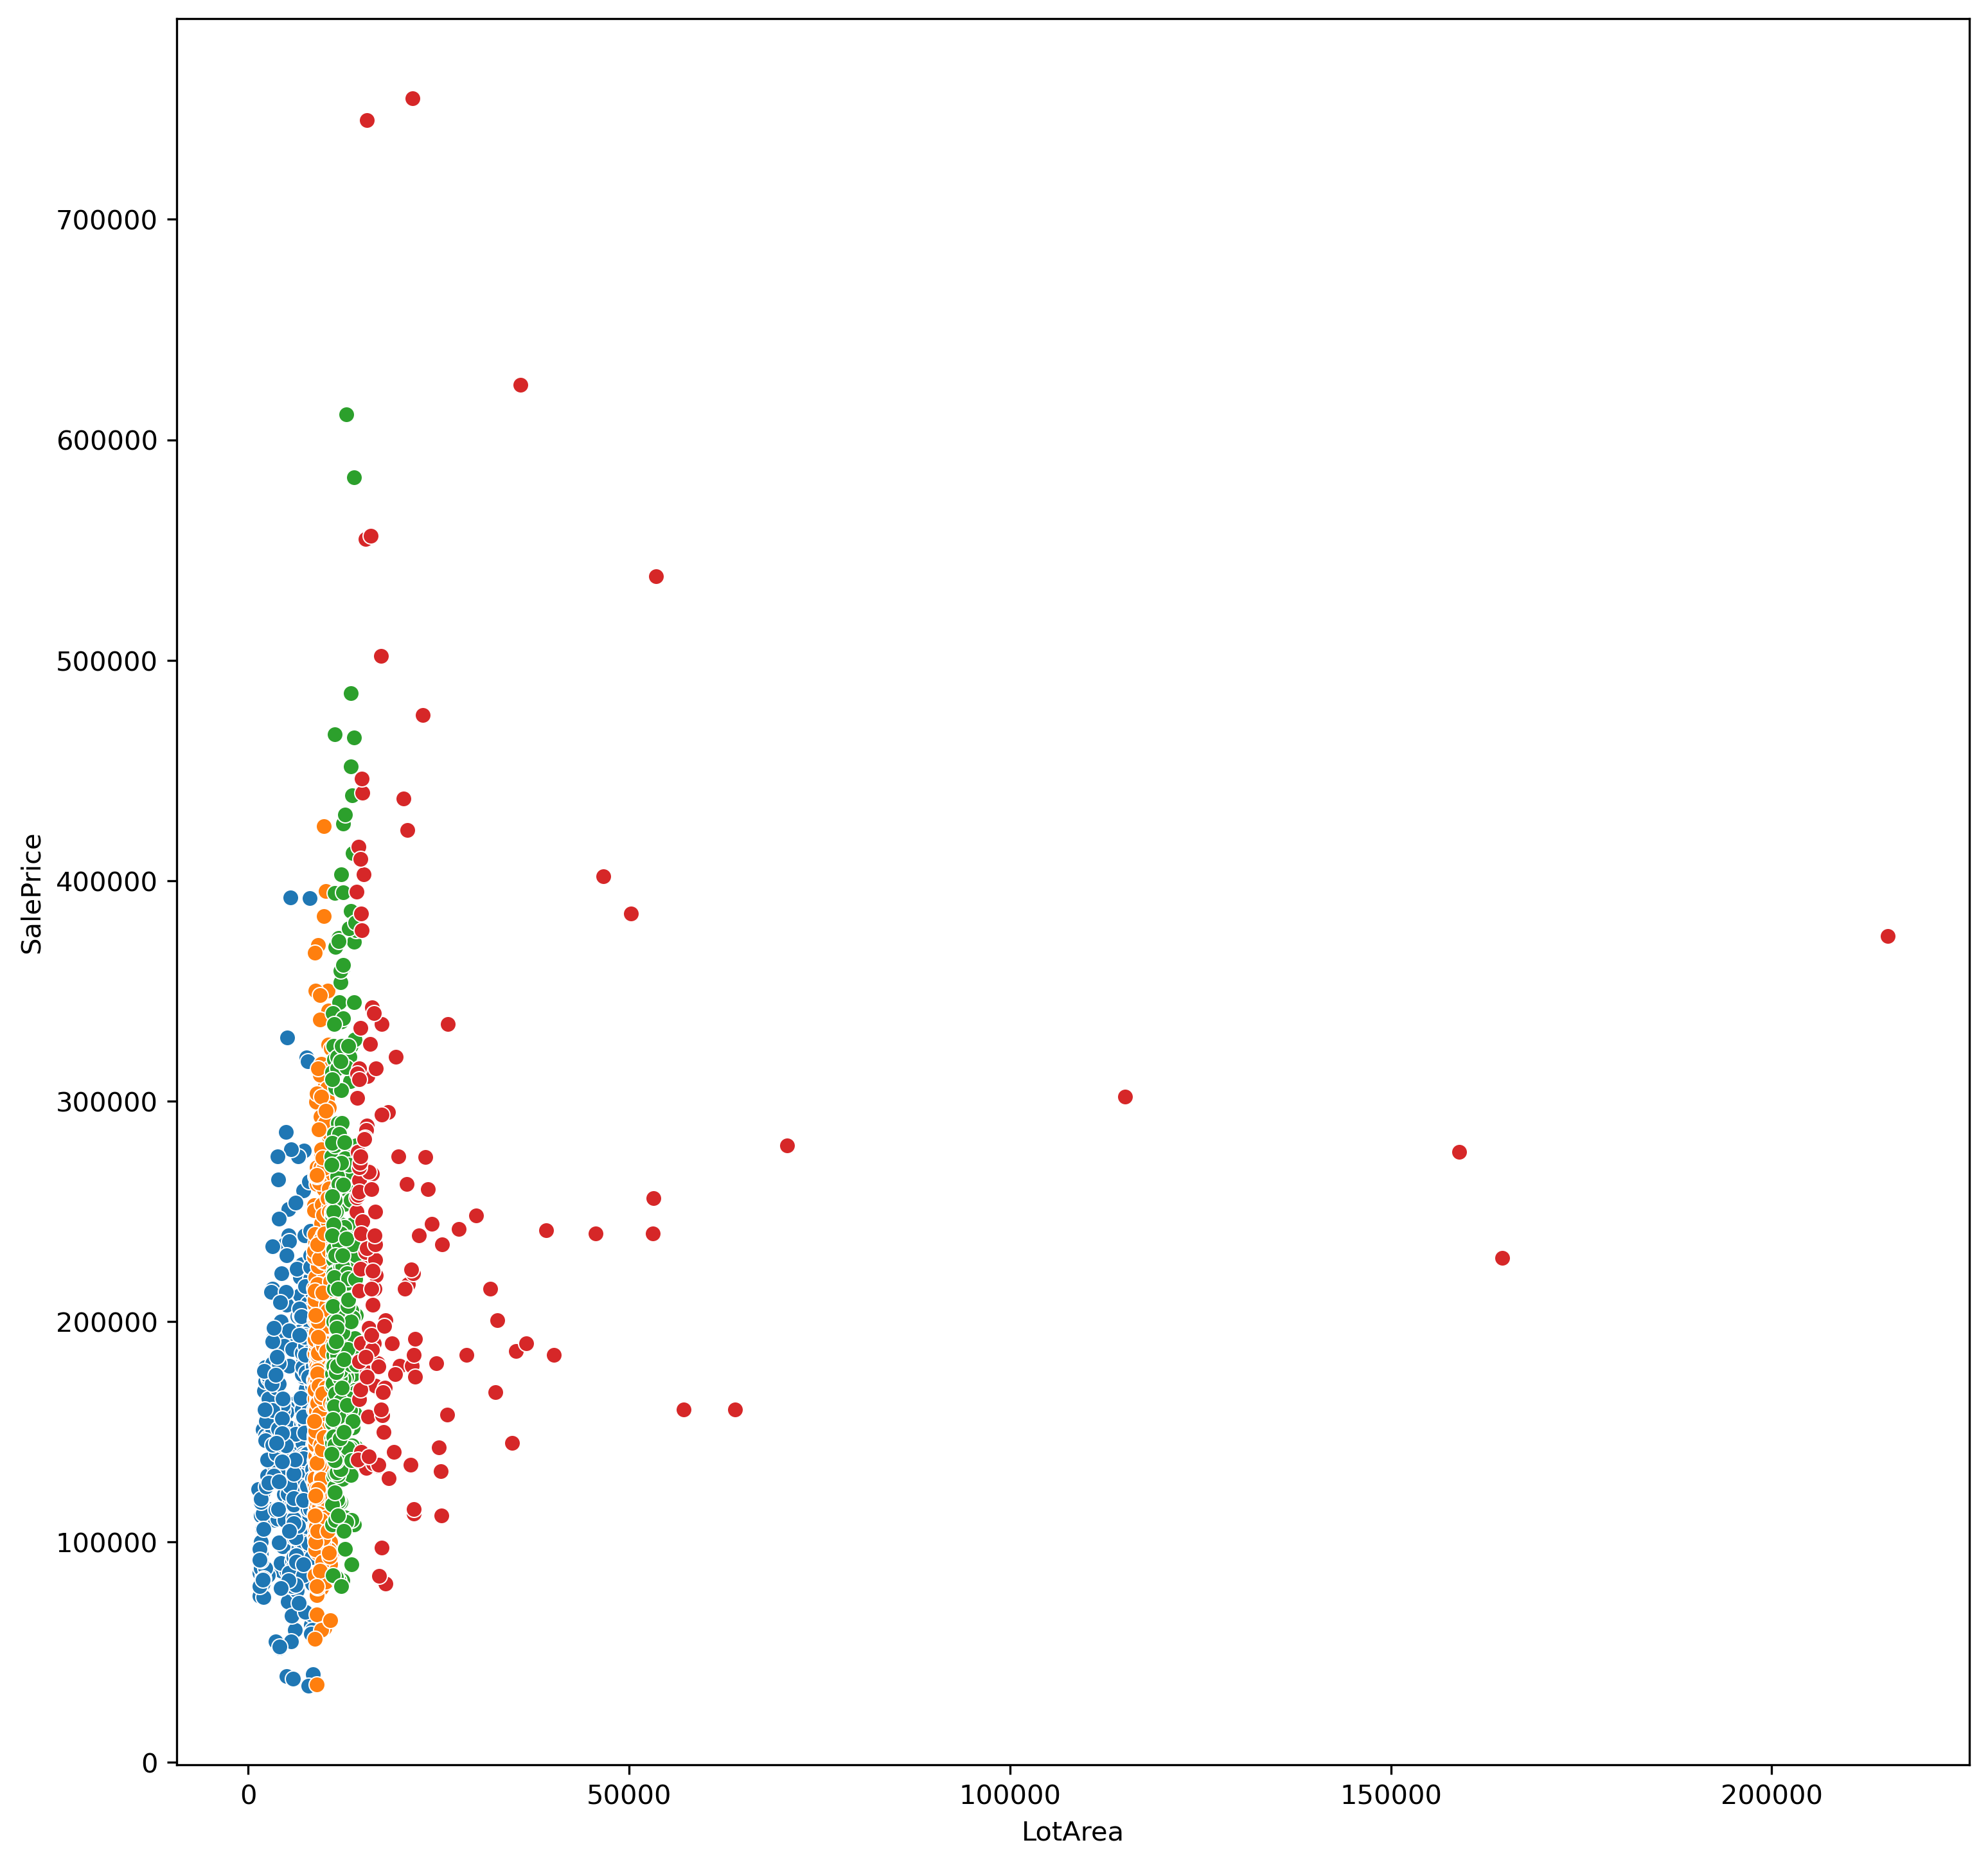

In [28]:
plt.figure(figsize=[12,12],dpi=300)
sns.scatterplot(x='LotArea',y='SalePrice',data=subset[subset.LotArea < 8618.2])
sns.scatterplot(x='LotArea',y='SalePrice',data=subset[(subset.LotArea >= 8618.2) & (subset.LotArea < 10923.6)])
sns.scatterplot(x='LotArea',y='SalePrice',data=subset[(subset.LotArea >= 10923.6) & (subset.LotArea < 14215.0)])
sns.scatterplot(x='LotArea',y='SalePrice',data=subset[subset.LotArea > 14215.0])
plt.show()